In [ ]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Cayan-Portela/ceub/main/dados/mtcars.csv')

In [ ]:
df.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


# Regressão linear - uma coluna independente e uma dependente

$ \text{mpg}_i = \beta_0 + \beta_1 \text{wt}_i + e_i $

Na Regressão linear a solução é analítica, só resolver uma conta e cabou
$$B = (X'X)^{-1} X'Y$$

In [ ]:
# Importe as bibliotecas necessárias (se já não estiverem importadas)
import pandas as pd  # Se você está usando um DataFrame do pandas

# Suponha que você já tenha um DataFrame chamado 'df' com as colunas 'mpg' e 'wt'

# Calculando a média de 'wt' e 'mpg' (média amostral)
x_barra = df['wt'].mean()  # Média de 'wt'
y_barra = df['mpg'].mean()  # Média de 'mpg'

# Calculando as diferenças entre os valores e suas respectivas médias
x_dif = df['wt'] - x_barra  # Diferenças em 'wt'
y_dif = df['mpg'] - y_barra  # Diferenças em 'mpg'

# Calculando o coeficiente de inclinação (b1) da regressão linear
b1 = (x_dif * y_dif).sum() / (x_dif**2).sum()
# O numerador é o somatório das diferenças cruzadas e o denominador é o somatório das diferenças ao quadrado

# Calculando o coeficiente de intercepto (b0) da regressão linear
b0 = y_barra - b1 * x_barra
# b0 é a média de 'mpg' menos b1 vezes a média de 'wt'

# Imprimindo os coeficientes da regressão linear
print('Coeficiente de inclinação (b1):', b1)
print('Coeficiente de intercepto (b0):', b0)

Coeficiente de inclinação (b1): -5.344471572722677
Coeficiente de intercepto (b0): 37.285126167342035


### regressão linear sklearn

In [ ]:
#regressão linear no sklearn
reg = LinearRegression().fit(np.array(wt).reshape(-1,1),mpg)

In [ ]:
print(f"Nossos betas: Beta0:{b0} Beta1:{b1}")
print(f"Betas do sklearn: beta0:{reg.intercept_}, beta1:{reg.coef_}")

Nossos betas: Beta0:37.285126167342035 Beta1:-5.344471572722677
Betas do sklearn: beta0:37.28512616734204, beta1:[-5.34447157]


In [ ]:
#regressão linar com scipy
from scipy import stats
result = stats.linregress(wt,mpg)
print(result.intercept,result.slope)

37.28512616734204 -5.344471572722678


#Regressão linear multipla - muitas variaveis no X

In [ ]:
# Importe as bibliotecas necessárias (se já não estiverem importadas)
import numpy as np  # Para lidar com matrizes e cálculos
import pandas as pd  # Para trabalhar com os dados

# Suponha que você já tenha um DataFrame 'df' com as colunas 'y' (variável de resposta) e 'X1', 'X2', 'X3', ... (variáveis preditoras)

# Converter os dados em matrizes numpy
X = df[['wt','cyl','hp']].values
y = df['mpg'].values

# Adicione uma coluna de 1s para o termo de intercepto (b0)
X = np.column_stack((np.ones(X.shape[0]), X))

# Calcular os coeficientes da regressão
# Coeficientes = (X^T * X)^-1 * X^T * y, onde '^T' denota a transposição e '^(-1)' denota a inversa de uma matriz
coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

# A matriz 'coefficients' agora contém os coeficientes da regressão (b0, b1, b2, b3, ...)

# Imprima os coeficientes
print('Coeficiente de intercepto (b0):', coefficients[0])
print('Coeficiente de X1 (b1):', coefficients[1])
print('Coeficiente de X2 (b2):', coefficients[2])
print('Coeficiente de X3 (b3):', coefficients[3])
# Continue com mais coeficientes, se houver mais variáveis preditoras

# Agora você pode usar esses coeficientes para fazer previsões


Coeficiente de intercepto (b0): 38.75178737286572
Coeficiente de X1 (b1): -3.16697311074861
Coeficiente de X2 (b2): -0.9416168119907696
Coeficiente de X3 (b3): -0.018038102143106565


#  "Mínimos Quadrados Ordinários" (MQO)

 chegar no X e y como matriz para fazer a seguinte conta


 B = (X'X)**-1*X'Y


X'X       = matrix de covariancia

(X'X)**-1 = Isso representa a inversa da matriz resultante do produto de X'X. A inversa é usada para resolver o sistema de equações lineares que estimará os coeficientes B.

 X'Y      = produto escalar entre X' e Y.

In [ ]:
# chegar no X e y como matriz para fazer a seguinte conta
# B = (X'X)**-1*X'Y

#X'X       = matrix de covariancia
#(X'X)**-1 = Isso representa a inversa da matriz resultante do produto de X'X. A inversa é usada para resolver o sistema de equações lineares que estimará os coeficientes B.
# X'Y      = produto escalar entre X' e Y.


In [ ]:
#esse codigo adiciona uma coluna com o valor 1 em tudo na primeira coluna e os dados normalmente nas outras

def matriz_x(coluna, dados):
    n_ = dados.shape[0]

    col_1 = np.ones(n_)
    col_var = dados[coluna]

    X_mat = np.c_[col_1, np.array(col_var)]

    return X_mat

In [ ]:
mat_X = matriz_x('wt', df) # sera uma matrix que tera a primeira coluna como 1, e a outra a coluna normal
y_ = df['mpg']

In [ ]:
Xlx = mat_X.T @ mat_X    #X'X = matrix de covariancia
inv_xlx = inv(Xlx)       #(X'X)**-1 = matrix de covariancia inversa

In [ ]:
#formula final
B = inv_xlx @ mat_X.T @ y_       # B = (X'.X) **-1  *  X'.Y
B                                # 2 Linhas e 1 coluna

array([37.28512617, -5.34447157])

# Criando uma coluna com o dobro do valor da coluna

In [ ]:
df['2wt'] = 2*df['wt'] #criando outra coluna que vai ser dependente de wt
df.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,2wt
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,5.24
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,5.75
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,4.64
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,6.43
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,6.88


In [ ]:
regr = LinearRegression()
regr.fit(df[['wt', '2wt']], df['mpg'])

LinearRegression()

In [ ]:
regr.intercept_, regr.coef_

(37.28512616734203, array([-1.06889431, -2.13778863]))

In [ ]:
preditos = regr.predict(df[['wt', '2wt']])

In [ ]:
erro = df['mpg'] - preditos
# Erro quadrático médio
np.mean(erro**2)

8.697560548229475

# Lista 1

## EXERCICIO 1
**Regressao linear simples**

      -Solucao analıtica matricial.
      - Gradiente descendente.



 **Qual o objetivo em estimar o vetor de parametros βˆ?**

    o objetivo em calcular o beta é determinar os melhores valores dos coeficientes que descrevem o relacionamento entre as variáveis independentes (caracteristicas, o nosso x) e a variável dependente (target, o nosso y) no modelo


In [ ]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder


In [ ]:
df_treino = pd.read_csv('https://raw.githubusercontent.com/Cayan-Portela/ceub/main/dados/insurance_treino.csv', sep=';', decimal=',')

In [ ]:
df_treino.head()

,age,sex,bmi,children,smoker,region,charges
0,34,female,23.56,0,no,northeast,4992.3764
1,45,female,33.10,0,no,southwest,7345.0840
2,23,male,32.70,3,no,southwest,3591.4800
3,38,female,19.95,2,no,northeast,7133.9025
4,32,female,29.80,2,no,southwest,5152.1340


### label encoder

In [ ]:
colunas_textuais = df_treino.select_dtypes(include='object').columns.tolist()
colunas_textuais

le = LabelEncoder()
for col in colunas_textuais:
    df_treino[col] = le.fit_transform(df_treino[col])

In [ ]:
df_treino.head()    # Female = 0   Male = 1    Smoker sim = 1      no = 0

,age,sex,bmi,children,smoker,region,charges
0,34,0,23.56,0,0,0,4992.3764
1,45,0,33.10,0,0,3,7345.0840
2,23,1,32.70,3,0,3,3591.4800
3,38,0,19.95,2,0,0,7133.9025
4,32,0,29.80,2,0,3,5152.1340


### Função que coloca 1 na frente da matriz

In [ ]:
def matriz_x(coluna, dados):
    '''
    essa função cria uma matriz com a primeira coluna tudo 1, e o resto das colunas normais

    coluna: os dados das variaveis independentes
    dados: fonte de dados
    '''

    n_ = dados.shape[0]

    col_1 = np.ones(n_)
    col_var = dados[coluna]

    X_mat = np.c_[col_1, np.array(col_var)]

    return X_mat

In [ ]:
Y = df_treino['charges']
X = matriz_x(['age', 'sex','children','smoker'], df_treino)

In [ ]:
X

array([[ 1., 34.,  0.,  0.,  0.],
       [ 1., 45.,  0.,  0.,  0.],
       [ 1., 23.,  1.,  3.,  0.],
       ...,
       [ 1., 18.,  0.,  0.,  0.],
       [ 1., 28.,  1.,  0.,  1.],
       [ 1., 61.,  0.,  4.,  0.]])

### Regressão linear multivariada

In [ ]:
Xlx = X.T @ X       #X'X       = matrix de covariancia
inv_xlx = inv(Xlx)  #(X'X)**-1 = matrix de covariancia invesra

In [ ]:
B = inv_xlx @ X.T @ Y  # B = (X'X)**-1*X'Y
B                      #tinhamos 5 colunas no total X= 'age', 'sex','children','smoker',  Y='charges'

array([-3017.92453292,   272.20653435,   -57.34384981,   556.55795561,
       23799.89105225])

### regressão linear multivariada SKLEARN

In [ ]:
regr = LinearRegression()
regr.fit(df_treino[['age', 'sex','children','smoker']], df_treino['charges'])

LinearRegression()

In [ ]:
regr.intercept_, regr.coef_

(-3017.924532924948,
 array([  272.20653435,   -57.34384981,   556.55795561, 23799.89105225]))

### Avaviando nosso modelo com a base de teste

In [ ]:
df_teste = pd.read_csv('https://raw.githubusercontent.com/Cayan-Portela/ceub/main/dados/insurance_teste.csv', sep=';', decimal=',')

In [ ]:
colunas_textuais = df_teste.select_dtypes(include='object').columns.tolist()
colunas_textuais

le = LabelEncoder()
for col in colunas_textuais:
    df_teste[col] = le.fit_transform(df_teste[col])

In [ ]:
df_teste.head()    # Female = 0   Male = 1    Smoker sim = 1      no = 0

,age,sex,bmi,children,smoker,region,charges
0,18,1,33.77,1,0,2,1725.55230
1,31,0,25.74,0,0,2,3756.62160
2,37,0,27.74,3,0,1,7281.50560
3,37,1,29.83,2,0,0,6406.41070
4,60,0,25.84,0,0,1,28923.13692


In [ ]:
X_teste = matriz_x(['age', 'sex','children','smoker'], df_teste)
B = [-3017.924532924948, 272.20653435, -57.34384981, 556.55795561, 23799.89105225]

### Multiplicando a matriz de dados, pela matriz de betas, para gerar o predict

In [ ]:
Y_predito = X_teste @ B
Y_predito

array([ 2381.00719118,  5420.47803193,  8723.39110486,  8109.48929944,
       13314.46752808,  3185.48190732,  2653.21372553, 28890.81870002,
       13314.46752808, 14711.93486056, 13066.55076755, 28902.96358693,
       37057.01473052,  3515.03229148,  8641.75748123,  8166.83314925,
       11896.09100652, 34347.09427393,  9540.01070791, 37625.71757304,
        7350.2135462 , 10299.28646115, 14902.50777128,  5160.41638449,
        8369.55094688, 28131.54294678, 13269.26856518, 10014.93503989,
        8142.54337543,  9231.36951283, 27269.72438083, 12274.22093832,
       31966.7242015 ,  9503.57604718, 11953.43485633,  2698.41268843,
       38454.482063  , 13350.90218881, 11896.09100652, 31068.47097482,
        1881.79308538, 39056.23898151,  6793.65559059,  5115.21742159,
       37873.63433357, 13257.12367827, 11445.45644836, 13586.67406243,
       12522.13769885,  5931.83702464,  2653.21372553,  9990.64526607,
       32214.64096203,  8901.81912867, 33790.53631832, 12262.07605141,
      

In [ ]:
#calculando o erro medio quadratico
erro = df_teste['charges'] - Y_predito
np.mean(erro**2)

48343255.08762763

### **Fazendo o calculo do beta da regressão linear multipla com  Gradiente Descendente**

In [ ]:
""" Gradiente Descendente """
import numpy as np

n = 1000

x1 = np.linspace(-5,5,n)                     #cria um vetor de -5 ate 5, tendo 1000 numeros

y1 = 3 + x1 + np.random.normal(size=1000)    #cria o target, adicionando uma constante(3), e multiplicando por um ruido numa distribuição normal

col_1 = np.ones(n)                           #Cria um vetor de 1s chamado col_1. Isso é feito para incluir um termo de interceptação na regressão linear.
X_mat = np.column_stack((col_1, x1))         #junta a coluna de 1 com a coluna de X criada

n_iter = 1000

### colocando um valor inicial para beta, geralmente inicializa com 0 ou com numeros aleatorios

In [ ]:
beta_ = list()
beta_.append(
    np.array([0,0])    #inicializando o beto com 0,0
)
lr = 0.01

In [ ]:
def grad_(X,B,Y):
  '''
  é uma função que calcula o gradiente (ou vetor de derivadas parciais

  X: é a matriz de recursos ou matriz de design ou variaveis independentes
  B: beta é um vetor de parâmetros do modelo (normalmente, incluindo o intercepto e os coeficientes de características), valor chutado
  Y: é o vetor de valores de saída ou target
  '''
  n = len(Y)                    # é usado para normalizar o gradiente pela quantidade de dados, tornando-o a média das derivadas parciais.

                                # X @ B               vai ser igual a estimativa predita dos dados
                                # X @ B - Y           calcula a diferença entre as estimativas e os valores reais.
                                # X.T                 é a matriz transposta de X
                                # X.T @ (X @ B - Y)   calcula o produto escalar entre a matriz transposta X.T e a diferença entre as estimativas e os valores reais.
  grad = X.T @ (X @ B - Y) / n  # /n                  é dividido por n para calcular a média do gradiente, tornando-o o gradiente médio dos resíduos do modelo.
  return grad

### iterando com o gradiente

In [ ]:
for i in range(1,n):
  gradiente = grad_(X=X_mat, B=beta_[i-1], Y=y1)
  beta_.append(
      beta_[i-1] - lr * gradiente
  )

In [ ]:
beta_[-1]#ultimo beta predito pelo gradiente

array([3.0322041 , 1.01313224])

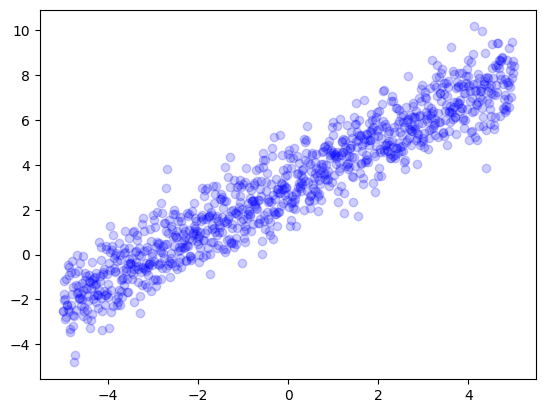

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x1,y1,'bo',alpha=0.2)

## Exercício 2 - BASE COM DEFEITO
Considerando o seguinte modelo de regress˜ao log´ıstica, ajuste um modelo de classifica¸c˜ao para os
dados bank customer (dispon´ıvel no github)


FOI RESOLVIDO DE DUAS FORMAS DE FAZER O NEWTON RAPHSON

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Cayan-Portela/ceub/main/dados/bank_customer_treino.csv')

df = df[['gender', 'age', 'credit_card', "estimated_salary", 'churn']]
df.head()

,gender,age,credit_card,estimated_salary,churn
0,Male,26,0,183490.99,0
1,Male,45,0,129870.93,0
2,Female,42,1,6409.55,0
3,Female,22,0,168412.07,1
4,Male,46,1,78250.13,1


In [ ]:
df.gender = np.where(df.gender == "Male", 1, 0)
df.head()               # Female = 0   Male = 1

,gender,age,credit_card,estimated_salary,churn
0,1,26,0,183490.99,0
1,1,45,0,129870.93,0
2,0,42,1,6409.55,0
3,0,22,0,168412.07,1
4,1,46,1,78250.13,1


In [ ]:
y = df['churn']
y

0       0
1       0
2       0
3       1
4       1
       ..
5995    0
5996    1
5997    0
5998    0
5999    0
Name: churn, Length: 6000, dtype: int64

###criando um modelo de regressão logistica usando o metodo **newton raphson**

VERSÃO 1

In [ ]:
import numpy as np
from numpy import linalg

In [ ]:
#calcula a probabilidade de um evento ocorrer com base nas características representadas por X e os parâmetros do modelo B.
def calcula_p(X,B):
  #X @ B calcula a previsão, ou os logits(por ser uma regressão logistica)
  '''np.exp(X @ B) / (1 + np.exp(X @ B)): A probabilidade (p) é calculada dividindo a exponencial de X @ B pelo resultado da soma de 1 com a exponencial.
   Isso fornece a probabilidade de um evento ocorrer com base nas características representadas por X e os parâmetros do modelo B.
   A probabilidade resultante estará no intervalo de 0 a 1, o que é apropriado para modelar probabilidades em um contexto de regressão logística.

   '''
  return np.exp(X @ B) / (1+np.exp(X @ B))

In [ ]:
def matriz_x(coluna, dados):
    n_ = dados.shape[0]

    col_1 = np.ones(n_)
    col_var = dados[coluna]

    X_mat = np.c_[col_1, np.array(col_var)]

    return X_mat

X_mat = matriz_x(coluna=["gender", "age", "credit_card", "estimated_salary"], dados=df)
pd.DataFrame(X_mat).head()

,0,1,2,3,4
0,1.0,1.0,26.0,0.0,183490.99
1,1.0,1.0,45.0,0.0,129870.93
2,1.0,0.0,42.0,1.0,6409.55
3,1.0,0.0,22.0,0.0,168412.07
4,1.0,1.0,46.0,1.0,78250.13


In [ ]:
n_col_X = X_mat.shape[1]  #numero de colunas da matrix
betas = np.zeros(n_col_X) # inicializa o beta com 0
betas

array([0., 0., 0., 0., 0.])

In [ ]:
p = calcula_p(X_mat, betas)  #calcula a probabilidade de um evento ocorrer com base nas características representadas por X e os parâmetros do modelo B.

In [ ]:
W = np.diag(p)             #transforma  a probabilidade em uma matrix diagonal
W

array([[0.5, 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0.5, 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0.5, ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0.5, 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0.5, 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0.5]])

In [ ]:
def beta_update(X, W, y, p):
  #X = matriz com dados independentes(caracteristicas)
  #W = matriz diagonal que contém as probabilidades calculadas p
  #Y = vetor de valores de saída (0s e 1s)
  #P = vetor de probabilidades calculadas

  #X.T @ W @ X: Esta é a forma quadrática da matriz de características ponderadas pela matriz de probabilidades W.
  #isso é usado em algoritmos de otimização para ajustar os parâmetros do modelo de regressão logística.

  #X.T @ (y - p): Isso multiplica a matriz de características transposta pela diferença entre o vetor de valores de saída y e o vetor de probabilidades calculadas p.

  #O resultado final da função é a multiplicação do inverso da matriz X.T @ W @ X pela expressão X.T @ (y - p). Esse cálculo é usado para atualizar os parâmetros do modelo.

    return inv(X.T @ W @ X) @ X.T @ (y-p)


In [ ]:
# Beta inicial = 0
n_col_X = X_mat.shape[1]
betas = np.zeros(n_col_X) #inicia o beta com 0 do tamanho da matriz
betas

for i in range(30):
    p = calcula_p(X_mat, betas)            #calcula a probabilidade de uma observação pertencer à classe positiva (1) com base nas características da observação e nos parâmetros do modelo
    W = np.diag(p)                         #calcula a matriz diagonal com as probabilidades
    beta_k1 = beta_update(X_mat, W, y, p)  #faz o update do beta com a função de beta_update
    betas = betas + beta_k1                # é adicionado o betak1 aos betas

np.round(betas,3)

array([-3.715, -0.487,  0.064, -0.047,  0.   ])

In [ ]:
X_mat

array([[1.0000000e+00, 1.0000000e+00, 2.6000000e+01, 0.0000000e+00,
        1.8349099e+05],
       [1.0000000e+00, 1.0000000e+00, 4.5000000e+01, 0.0000000e+00,
        1.2987093e+05],
       [1.0000000e+00, 0.0000000e+00, 4.2000000e+01, 1.0000000e+00,
        6.4095500e+03],
       ...,
       [1.0000000e+00, 0.0000000e+00, 4.0000000e+01, 1.0000000e+00,
        1.7654780e+05],
       [1.0000000e+00, 1.0000000e+00, 3.6000000e+01, 1.0000000e+00,
        7.2924560e+04],
       [1.0000000e+00, 0.0000000e+00, 3.3000000e+01, 0.0000000e+00,
        1.9933663e+05]])

### Bank customer treinando o modelo nos dados de treino usando newton raphson

VERSÃO 2

In [ ]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
""" funções auxiliares: """
def calcula_p(X,B):
   return np.exp(X @ B) / (1+np.exp(X @ B))

def matriz_x(coluna, dados):
    n_ = dados.shape[0]

    col_1 = np.ones(n_)
    col_var = dados[coluna]

    X_mat = np.c_[col_1, np.array(col_var)]

    return X_mat

def beta_update(X, W, y, p):
    return inv(X.T @ W @ X) @ X.T @ (y-p)

def beta_inicial(X):
    return np.zeros(X.shape[1])

""" Exercícios de newton raphson"""
dados = pd.read_csv("https://raw.githubusercontent.com/Cayan-Portela/ceub/main/dados/bank_customer_treino.csv")


In [ ]:
dados['gender'] = np.where(dados.gender == "Male", 1, 0)
dados.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15765192,564,France,1,26,7,84006.88,2,0,0,183490.99,0
1,15631882,688,Germany,1,45,9,103399.87,1,0,0,129870.93,0
2,15777586,784,Spain,0,42,2,109052.04,2,1,0,6409.55,0
3,15577107,657,Spain,0,22,6,0.00,3,0,1,168412.07,1
4,15722731,653,France,1,46,0,119556.10,1,1,0,78250.13,1


In [ ]:
col_x = ['credit_score', 'gender', 'age', 'credit_card']
col_y = 'churn'

In [ ]:
X_mat = matriz_x(col_x, dados)    #matriz com as caracteristicas mais a primeira coluna com 1        || shape = (6000,5)
y = dados[col_y]                  #matriz com os targets                                             || shape = (6000,)
betas = beta_inicial(X_mat)       #inicializa o beta com 0 do tamanho da matriz que passou na função || shape = (5,)   TEMOS 5 BETAS PQ TEMOS 5 COLUNAS, 4 DE CARACTERISTICAS E 1 DE TARGET
p = calcula_p(X_mat, betas)       #calcula a probabilidade de uma observação pertencer a classe 1    || shape = (6000,)
w = np.diag(p)                    #cria uma matriz diagonal, sendo a diagonal as probabilidades      || shape = (6000,6000)
print("X_mat: \n", X_mat)
print("y: \n", y)
print("betas: \n", betas)
print("p: \n", p)
print("w: \n", w)


X_mat: 
 [[  1. 564.   1.  26.   0.]
 [  1. 688.   1.  45.   0.]
 [  1. 784.   0.  42.   1.]
 ...
 [  1. 461.   0.  40.   1.]
 [  1. 765.   1.  36.   1.]
 [  1. 534.   0.  33.   0.]]
y: 
 0       0
1       0
2       0
3       1
4       1
       ..
5995    0
5996    1
5997    0
5998    0
5999    0
Name: churn, Length: 6000, dtype: int64
betas: 
 [0. 0. 0. 0. 0.]
p: 
 [1. 1. 1. ... 1. 1. 1.]
w: 
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
beta_update(X_mat, w, y, p)

array([-1.11957385e+00, -9.74073306e-05, -7.35001970e-02,  1.11116277e-02,
       -6.09965405e-03])

### criando um laço para fazer a iteração da regressão logistica usando newton raphson

In [ ]:
betas = beta_inicial(X_mat)
p = calcula_p(X_mat, betas)
w = np.diag(p)

for i in range(10):
    p = calcula_p(X_mat, betas)
    W = np.diag(p)
    beta_k1 = beta_update(X_mat, W, y, p)
    betas = betas + beta_k1



In [ ]:
betas

array([-3.25573132e+00, -6.58026852e-04, -4.89083616e-01,  6.40302961e-02,
       -4.90911654e-02])

In [ ]:
p     # no caso em questão é a chance de evadir (como evadir é 1, quanto mais perto de 0, menos chance de evadir)

array([0.07933037, 0.2114822 , 0.24392769, ..., 0.25983938, 0.12001585,
       0.18329805])

### Regressão logistica usando sklearn

In [ ]:
# Regressão logística sklearn
from sklearn.linear_model import LogisticRegression

sk_logistica = LogisticRegression()
sk_logistica.fit(dados[col_x], y)

LogisticRegression()

In [ ]:
print(f'Nossos Betas: {np.round(betas,3)}')
print(f'Sklearn Betas: {sk_logistica.intercept_, sk_logistica.coef_}')

Nossos Betas: [-3.256e+00 -1.000e-03 -4.890e-01  6.400e-02 -4.900e-02]
Sklearn Betas: (array([-3.27061466]), array([[-0.00063749, -0.49520859,  0.0641967 , -0.05292901]]))


### Calculando a probabilidade de p (evento acontecer), na base de teste

In [ ]:
""" Calcular o p de cada cliente na tabela teste """
dados_teste = pd.read_csv("https://raw.githubusercontent.com/Cayan-Portela/ceub/main/dados/bank_custoter_teste.csv")
dados_teste['gender'] = np.where(dados_teste.gender == "Male", 1, 0)


In [ ]:
col_x = ['credit_score', 'gender', 'age', 'credit_card']
col_y = 'churn'

In [ ]:
X_mat = matriz_x(col_x, dados_teste)
y = dados_teste[col_y]
p_teste = calcula_p(X_mat, betas) # a diferença é que agora ja vamos usar o beta que treinamos, para validar na base de teste
print("betas: \n", betas)
print("Probabilidade de evasão: \n", p_teste)

betas: 
 [-3.25573132e+00 -6.58026852e-04 -4.89083616e-01  6.40302961e-02
 -4.90911654e-02]
Probabilidade de evasão: 
 [0.26446899 0.26297371 0.15507199 ... 0.13097248 0.19510378 0.16622374]


In [ ]:
np.sort(p_teste)[::-1][:10]

array([0.8646357 , 0.83895565, 0.8365764 , 0.83477935, 0.82261039,
       0.80036349, 0.7937318 , 0.78956555, 0.78290534, 0.77412462])

In [ ]:
""" Criando uma matriz de confusão com os valores reais e preditos """
pd.crosstab(
    np.where(p_teste > 0.5, 1, 0),    # linhas
    dados_teste['churn']              # colunas
)

churn,0,1
row_0,,
0,3089,753
1,116,42


In [ ]:
print("Acurácia = ", (3089 + 42)/4000)      # Todos os acertos pelo total de registros
print("Recall = ", 42/(42+753))             # Todos que o modelo chutou certo pelo quantidade de valores certos daquela categoria
print("Precisão = ", (42)/ (42+116))        # Todos que realmente eram verdadeiros, pelos que realmente eram mais os que o modelo preveu que eram

Acurácia =  0.78275
Recall =  0.052830188679245285
Precisão =  0.26582278481012656


## Exercício 3

**a) Newton-Raphson**

**b) Gradiente Descendente**

Calcule $\sqrt{10} $ com precisão de 8 casas decimais

Quando é dado um valor específico como raiz de 10, quando achamos a função para igualar a 0 já é como se fosse uma derivada

Usando:

a) Newton-Raphson (achar raiz)

b) Gradiente Descendente (achar o mínimo)

Newton-Raphson $ \text{X}_{k+1}= \text{X}_{k} - \text{F(x)}_{k}/\text{F'(x)}_{k}$

Gradiente Descendente $\text{X}_{k+1}= \text{X}_{k} - α * \text{f(x)}_{K} $

### Newton-Raphson

In [ ]:
"""
a) Newton-Raphson
F(x) = 0
x = sqrt(10)  ->  x^2 = 10  -> x^2 -10 = 0  -> F(x) = x^2 - 10

Aplicando a função acima
F(x) = x^2 - 10
F'(x) = 2x
x - (x^2-10/2x)  ->  x - x^2/2x + 10
x - x/2 + 10/2x
x/2 + 10/2x
1/2 * (x + 10/x)
"""
def x_update(x):
    return 1/2 * (x + 10/x)

In [ ]:
x_ = 3

for i in range(20):
    x_ = x_update(x_)

In [ ]:
import numpy as np
print(round(x_,10))
np.sqrt(10)

3.1622776602


3.1622776601683795

### Gradiente Descendente

In [ ]:
"""
b) Gradiente Descendente

O alpha é a taxa de aprendizado, é um hiperparametro escolhido por nós

"""
def x_updateG(x):
    return x - (0.01*((x**2)-10))

In [ ]:
x_ = 3

for idx,z in enumerate(range(350)):
    x_ = x_updateG(x_)
    print(idx+1, x_)

1 3.01
2 3.019399
3 3.02823129678799
4 3.036529448919527
5 3.044324337977972
6 3.0516452312299216
7 3.0585198450570386
8 3.0649744086309614
9 3.071033727375334
10 3.0767212458285655
11 3.082059109583237
12 3.087068226033587
13 3.0917683237117255
14 3.0961780100366534
15 3.100314827338308
16 3.1041953070521706
17 3.1078350220089233
18 3.1112486367686714
19 3.114449955970722
20 3.1174519706882617
21 3.1202669027927805
22 3.12290624734614
23 3.1253808130490044
24 3.127700760783256
25 3.129875640293214
26 3.1319144250562054
27 3.133825545397454
28 3.135616919907598
29 3.13729598522349
30 3.1388697242344956
31 3.140344692777336
32 3.1417270448827885
33 3.1430225566373093
34 3.144236648722
35 3.1453744076903343
36 3.146440606044801
37 3.1474397211711254
38 3.1483759531870676
39 3.1492532417610017
40 3.1500752819535798
41 3.1508455391338304
42 3.151567263019035
43 3.152243500885702
44 3.1528771099969406
45 3.153470769289514
46 3.15402699036188
47 3.1545481278025678
48 3.155036388896341
49 3.1

In [ ]:
print(x_)

## Exercício 4

Mostre que a raíz de $x^4 - 2x^3 + 2x - 2$ está entre 1 e 2 usando **Newton-Raphson**.

Seja $$x^4 - 2x^3 + 2x - 2$$
Então $$4x^3 - 6x^2 + 2 $$

In [ ]:
def updatex(x):
    return (x**4 - 2*x**3 + 2*x - 2) / (4*x**3 - 6*x**2 + 2)

In [ ]:
x_ = 3
for x in range(50):
    x_ = x_ - updatex(x_)
    print(x_)

2.446428571428571
2.064013324670046
1.8322618172598713
1.7343447388659876
1.7171622778064046
1.716673137346497
1.7166727492825309
1.7166727492822869
1.7166727492822864
1.716672749282287
1.7166727492822866
1.7166727492822866
1.7166727492822866
1.7166727492822866
1.7166727492822866
1.7166727492822866
1.7166727492822866
1.7166727492822866
1.7166727492822866
1.7166727492822866
1.7166727492822866
1.7166727492822866
1.7166727492822866
1.7166727492822866
1.7166727492822866
1.7166727492822866
1.7166727492822866
1.7166727492822866
1.7166727492822866
1.7166727492822866
1.7166727492822866
1.7166727492822866
1.7166727492822866
1.7166727492822866
1.7166727492822866
1.7166727492822866
1.7166727492822866
1.7166727492822866
1.7166727492822866
1.7166727492822866
1.7166727492822866
1.7166727492822866
1.7166727492822866
1.7166727492822866
1.7166727492822866
1.7166727492822866
1.7166727492822866
1.7166727492822866
1.7166727492822866
1.7166727492822866


In [ ]:
print(x_)

1.7166727492822866


## Exercicio 5

Newton Raphson

Calcule os próximos 10 passos de $3x^{1/3} = 0$, com o $X_0 = 0.01$

Seja $$3x^{1/3} = 0$$
Então $$F(x) = 3x^{1/3} $$
Encontrando a derivada $$F'(x) = \frac{1}{3} * 3x^{\frac{1}{3}-\frac{3}{3}}$$
$$F'(x) = x^-\frac{2}{3} $$
Aplicando na fórmula $$X_{n+1} = X_n - \frac{3x^{1/3}}{x^-{2/3}}$$
Como $$\frac{x^{1/3}}{x^-{2/3}} = x^{\frac{1}{3}+\frac{2}{3}} = x^1$$
Então $$X_{n+1} = X_n - 3x^1$$
Finalmente $$X_{n+1} = 2x$$

In [ ]:
def x_update(x):
    return (3 * x ** (1/3))/ (x**(-2/3))

In [ ]:
x_ = 0.01
for i in range(10):
    x_ =x_ -  x_update(x_)
    print(x_)

-0.02000000000000001
(0.04000000000000004-1.416851021469438e-17j)
(-0.0800000000000001+2.8337020429388764e-17j)
(0.16000000000000025-2.394310435477711e-16j)
(-0.3200000000000005+4.788620870955422e-16j)
(0.640000000000001-9.605688261606538e-16j)
(-1.280000000000002+1.921137652321307e-15j)
(2.5600000000000036-3.74626643355645e-15j)
(-5.120000000000006+7.492532867112897e-15j)
(10.24000000000001-1.535700859227141e-14j)


## EXERCICIO 6

Utilize o método de **Newton-Raphson** para encontrar a **raíz da equação**
 $x^4 - 5x^3 + 9x + 3 = 0$
no intervalo [4, 6]

A derivada sendo $4x^3 - 15x^2 + 9$


Newton-Raphson $ \text{X}_{k+1}= \text{X}_{k} - \text{F(x)}_{k}/\text{F'(x)}_{k}$

In [ ]:
def x_update(x):
    return (x**4 - 5*x**3 + 9*x + 3) / (4*x**3 - 15*x**2 + 9)

In [ ]:
x_ = 4
for i in range(10):
    x_ = x_ - x_update(x_)
    print(x_)

"""
A raiz entre 4 e 6 é 4.52891
"""

5.0
4.641791044776119
4.5375439592074756
4.528973727325634
4.528917959646293
4.528917957294362
4.528917957294362
4.528917957294362
4.528917957294362
4.528917957294362


'\nA raiz entre 4 e 6 é 4.52891\n'

In [ ]:
"""bibliotecas e funções a serem usadas"""
import pandas as pd
import numpy as np
from numpy.linalg import inv
from sklearn.preprocessing import MinMaxScaler


def matriz_x(coluna, dados):
    n_ = dados.shape[0]

    col_1 = np.ones(n_)
    col_var = dados[coluna]

    X_mat = np.c_[col_1, np.array(col_var)]

    return X_mat

def calcula_p(X,B):
   return np.exp(X @ B) / (1+np.exp(X @ B))

def beta_update(X, y, p):
    return X.T @ (y-p)

def beta_inicial(X):
    return np.zeros(X.shape[1])

# Betas modelos de classificação gradiente descendente

In [ ]:
"""
Encontrando os betas de um modelo de classificação sobre bank customer com gradiente descendente
"""
dados = pd.read_csv("https://raw.githubusercontent.com/Cayan-Portela/ceub/main/dados/bank_customer_treino.csv")
dados['gender'] = np.where(dados.gender == "Male", 1, 0)
dados.head()
col_x = ["gender", "age", "credit_card", "credit_score"]
col_x_std = ["gender", "age_std", "credit_card", "credit_score_std"]
col_y = 'churn'

### normalizando os dados

In [ ]:
dados['credit_score_std'] = (dados.credit_score - np.mean(dados.credit_score)) / np.std(dados.credit_score)
dados['age_std'] = (dados.age - np.mean(dados.age)) / np.std(dados.age)
dados

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,credit_score_std,age_std
0,15765192,564,France,1,26,7,84006.88,2,0,0,183490.99,0,-0.884431,-1.231208
1,15631882,688,Germany,1,45,9,103399.87,1,0,0,129870.93,0,0.395807,0.555991
2,15777586,784,Spain,0,42,2,109052.04,2,1,0,6409.55,0,1.386959,0.273802
3,15577107,657,Spain,0,22,6,0.00,3,0,1,168412.07,1,0.075747,-1.607460
4,15722731,653,France,1,46,0,119556.10,1,1,0,78250.13,1,0.034449,0.650055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,15689344,615,Spain,1,42,4,0.00,3,0,1,120321.09,0,-0.357882,0.273802
5996,15685309,669,France,0,35,7,0.00,1,1,1,49108.23,1,0.199641,-0.384640
5997,15689955,461,France,0,40,7,0.00,2,1,0,176547.80,0,-1.947855,0.085676
5998,15804256,765,Germany,1,36,8,92310.54,2,1,1,72924.56,0,1.190794,-0.290577


In [ ]:
X_std = matriz_x(col_x_std, dados)
Y = dados[col_y]

betas = beta_inicial(X_std)
alpha = 0.01
p = calcula_p(X_std, betas)
m = X_std.shape[0]

for i in range(10000):
    p = calcula_p(X_std, betas)
    beta_k1 = -(1/m)*beta_update(X_std, Y, p)
    betas = betas - alpha*beta_k1


In [ ]:
betas

array([-1.11251613, -0.51343412,  0.67890757, -0.11700738, -0.06398309])